# ME-371 Final Project: Part 2
Author: KangHyuk (Chris) Lee


## Dataset and Problem Statement




Source: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/

Official Description: Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.



Problem statement: Develop a SVM to classify tumors as malignant or benign

## Exploratory Data Analysis

#### Mount Google Drive and initialize dataframe

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/ME-371 Data Driven Notebook/Final/breast-cancer.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# View column headers and first 5 entries
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Observation: The dependent variable is diagnosis, which can be classified to either M for malignant and B for benign. Besides the diagnosis and id columns, the rest of the columns quantitatively describe the tumor, which suggests they should all be included as independent variables.

#### Initial dataset exploration


In [ ]:
# Shape of df
print(f"DataFrame Shape: {df.shape}\n")

# Statistical summary
print("Statistical Summary:")
print(df.describe())

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())


DataFrame Shape: (569, 32)

Statistical Summary:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919

Observations:

*   The dataset contains 32 columns and 569 rows of data.
*   The results of the statistical summary can be used to compare columns.
*   There are no missing value, which means none of the rows have to be removed.


#### Correlation between all variables

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Pairwise plot
sns.pairplot(df)
plt.savefig('PairwisePlot.png')
files.download('PairwisePlot.png') # Download plot for easier interaction

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x79fbfced2050> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x79fbfced12d0> (for post_execute):


KeyboardInterrupt: ignored

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

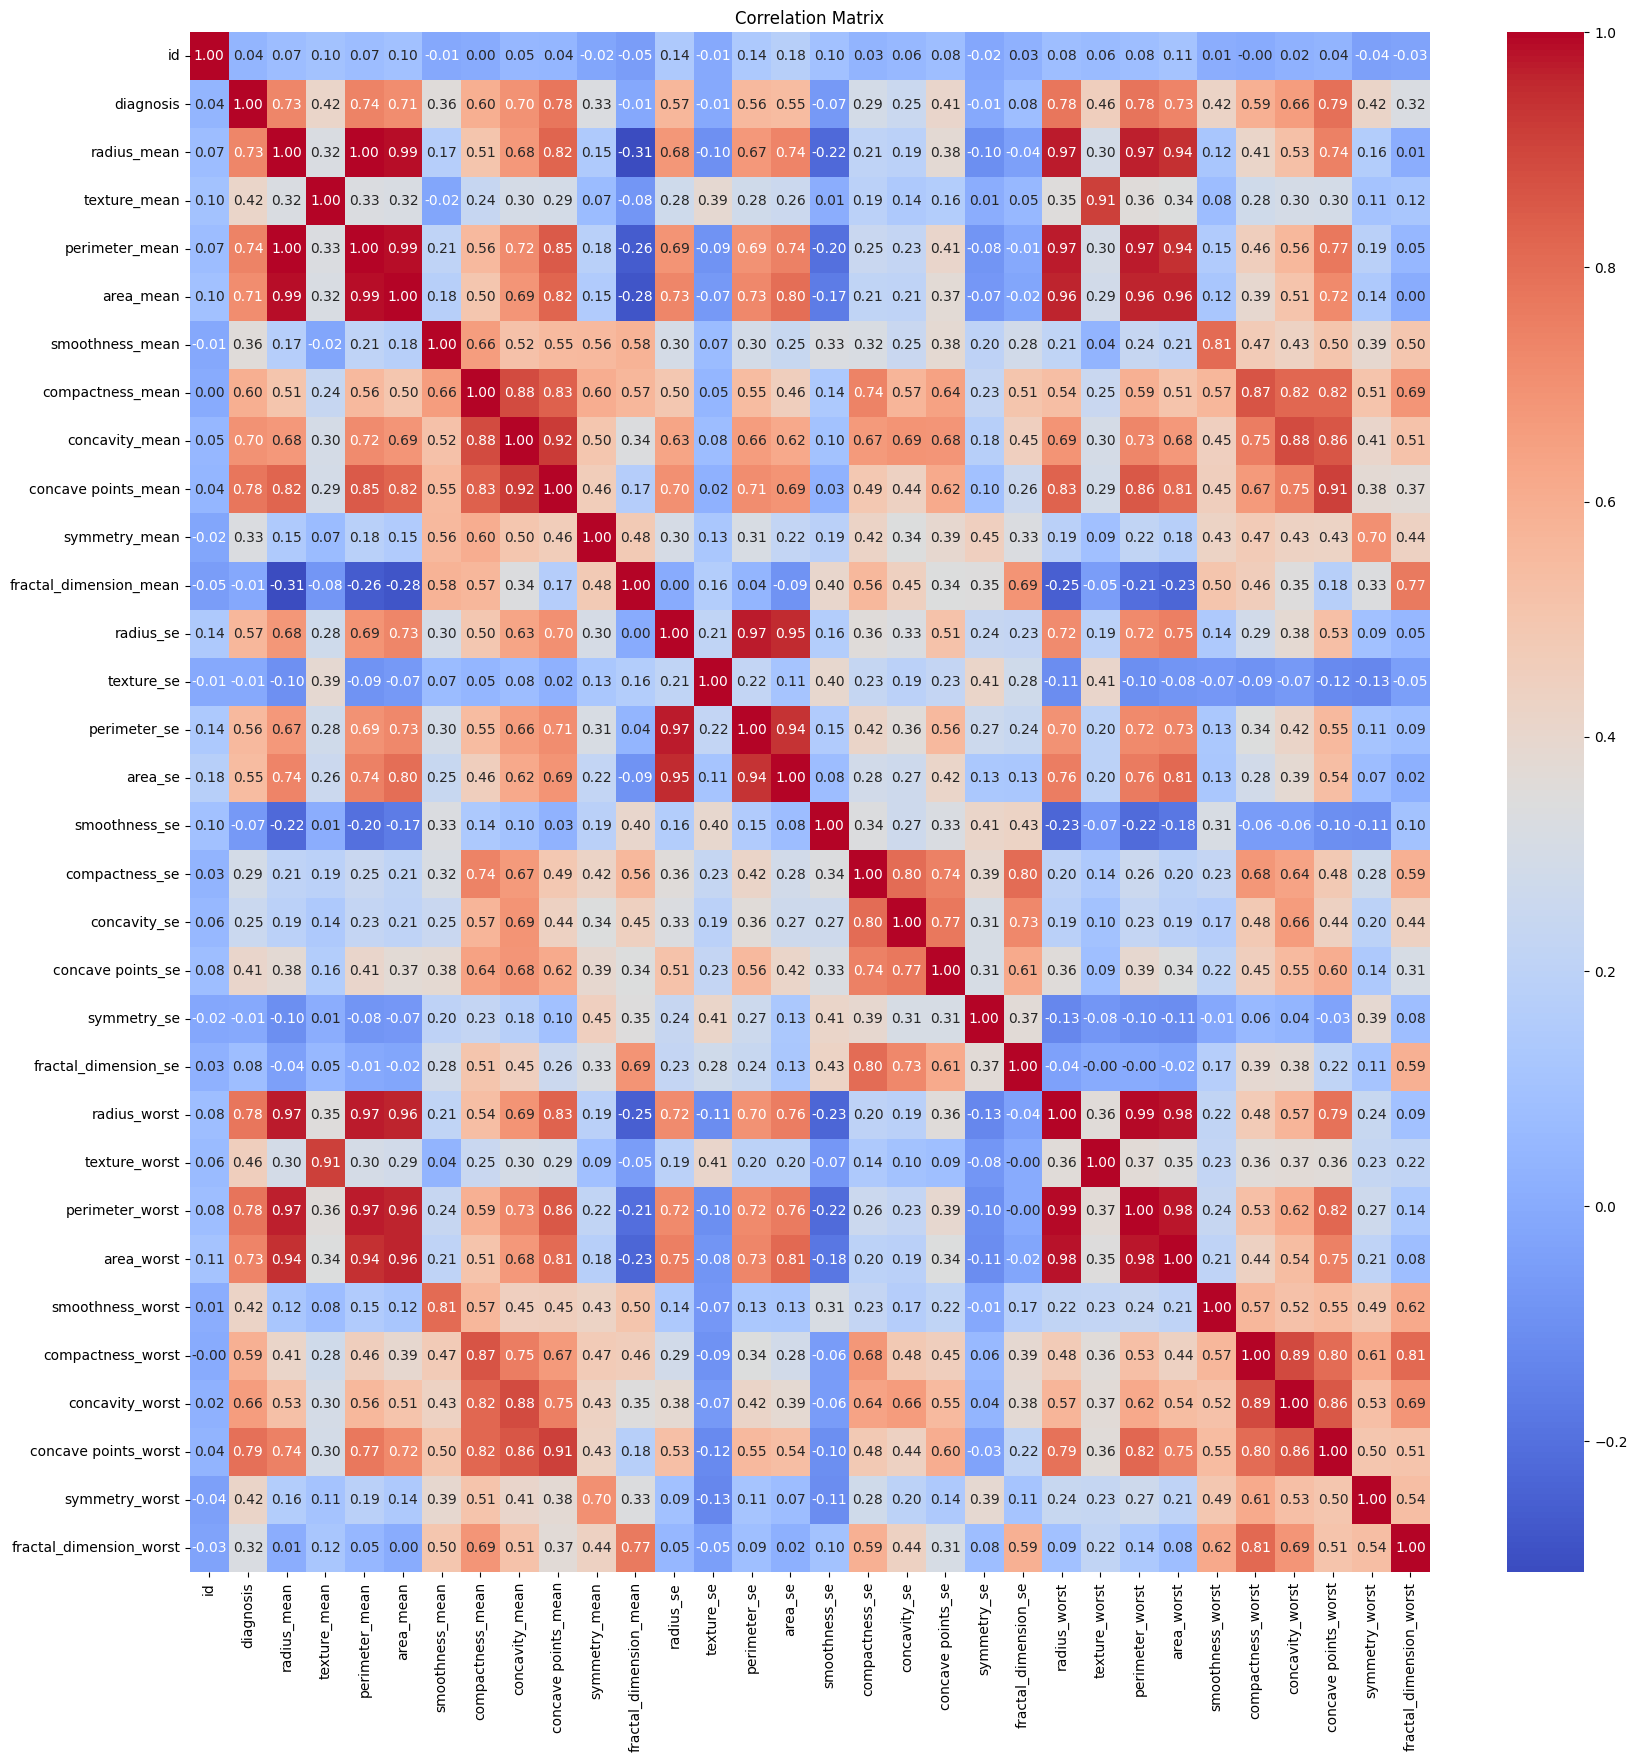

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig('CorrelationMatrix.png')
files.download('CorrelationMatrix.png') # Download plot for easier interaction
plt.show()


Observation: The correlation matrix shows there are clusters of highly correlated variables, but there are no major trends.

## Model Development

#### Encoding

In order to work with numbers, the diagnosis labels will be changed. M will become 1 and B will become 0.

In [ ]:
# Replace B and M with 0 and 1 for Diagnosis
df['diagnosis'].replace({'B': 0, 'M': 1}, inplace=True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: title={'center': 'diagnosis distribution'}>

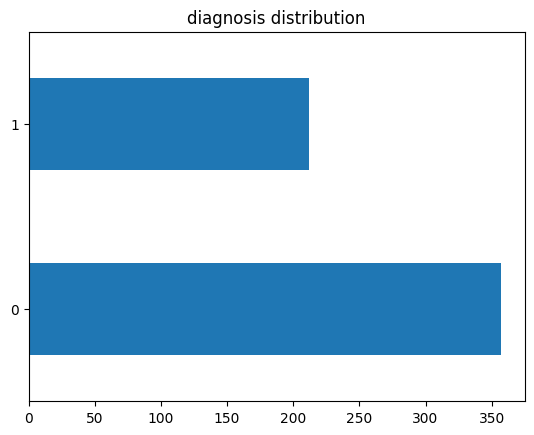

In [ ]:
# Check for dianosis distribution
df['diagnosis'].value_counts().plot(kind='barh', title='diagnosis distribution')

#### SVM

In [ ]:
# Import libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Separate data into dependent and independent variables
x_data=np.array(df.drop(columns=['id', 'diagnosis']))
y_data=df['diagnosis']

# Normalize data
MinMaxscaler = MinMaxScaler()
x_data_scaled = MinMaxscaler.fit_transform(x_data)  # transform data

# Split into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x_data_scaled,y_data,test_size=0.2, random_state=10)

In [ ]:
# Initialize SVM object
svm = SVC(kernel = 'rbf', C = 1,gamma='scale')

# Fit SVM to data
svm.fit(x_train,y_train)

# Make predictions
yhatTest=svm.predict(x_test)
yhatTrain=svm.predict(x_train)

#### SVM evaluation

Test Accuracy: 0.974
Train Accuracy: 0.982
----------------------------------------
Test Jaccard Index: 0.929
Train Jaccard Index: 0.954
----------------------------------------
Test F-Score: 0.963
Train F-Score: 0.976
----------------------------------------
Test Log-loss: 0.949
Train Log-loss: 0.634
----------------------------------------


Text(0.5, 1.0, 'Confusion Matrix - Train Set')

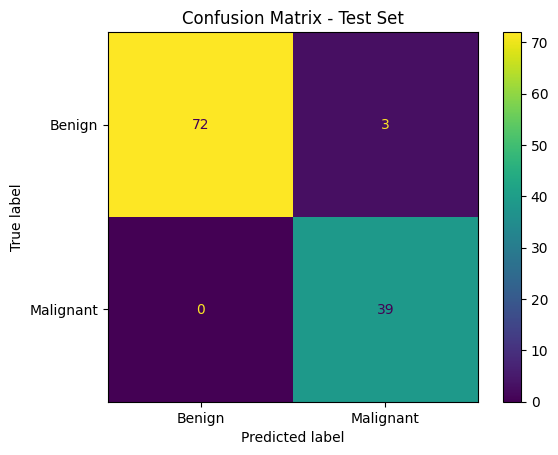

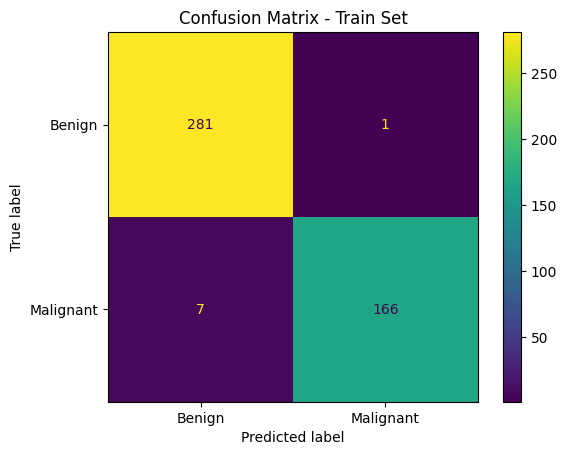

In [ ]:
# Import libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Accuracy
accTest = accuracy_score(y_test,yhatTest)
print(f'Test Accuracy: {accTest:.3f}')
accTrain = accuracy_score(y_train,yhatTrain)
print(f'Train Accuracy: {accTrain:.3f}')
print(40*'-')

# J-score
J_scoreTest = jaccard_score(y_test,yhatTest)
print(f'Test Jaccard Index: {J_scoreTest:.3f}')
J_scoreTrain = jaccard_score(y_train,yhatTrain)
print(f'Train Jaccard Index: {J_scoreTrain:.3f}')
print(40*'-')

# F-score
F_scoreTest = f1_score(y_test,yhatTest)
print(f'Test F-Score: {F_scoreTest:.3f}')
F_scoreTrain = f1_score(y_train,yhatTrain)
print(f'Train F-Score: {F_scoreTrain:.3f}')
print(40*'-')

#Log-loss
LogLossTest = log_loss(y_test,yhatTest)
print(f'Test Log-loss: {LogLossTest:.3f}')
LogLossTrain = log_loss(y_train,yhatTrain)
print(f'Train Log-loss: {LogLossTrain:.3f}')
print(40*'-')

# Confusion matrix

# Test set
CMTest = confusion_matrix(y_test,yhatTest)
dispTest = ConfusionMatrixDisplay(CMTest,display_labels=['Benign','Malignant'])
dispTest.plot()
plt.title('Confusion Matrix - Test Set')

# Train set
CMTrain = confusion_matrix(y_train,yhatTrain)
dispTrain = ConfusionMatrixDisplay(CMTrain,display_labels=['Benign','Malignant'])
dispTrain.plot()
plt.title('Confusion Matrix - Train Set')

Observation: The values for quantitative analysis as well as the Confusion Matrix show that the SVM worked very well in classifying tumors as benign or malignant. Only 3 test samples were labeled inaccurately out of 114, which means SVMs should be used for classification of breast tumors. As the accuracy values were high and close to one another for the training and testing set, the accuracy values suggest overfitting did not occur.

#### Logistic regression

In [ ]:
# Import libraries
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
lr = LogisticRegression(C=10.0, max_iter=500)

# Fit model to training data
lr.fit(x_train,y_train)

# Make predictions
yhatTest=lr.predict(x_test)
yhatTrain=lr.predict(x_train)

Test Accuracy: 0.982
Train Accuracy: 0.978
----------------------------------------
Test Jaccard Index: 0.950
Train Jaccard Index: 0.943
----------------------------------------
Test F-Score: 0.974
Train F-Score: 0.971
----------------------------------------
Test Log-loss: 0.632
Train Log-loss: 0.792
----------------------------------------


Text(0.5, 1.0, 'Confusion Matrix - Train Set')

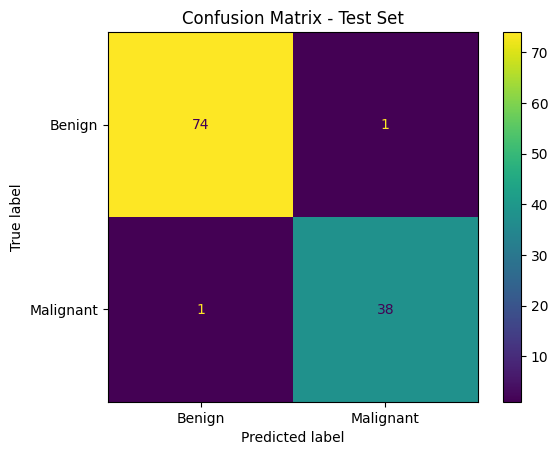

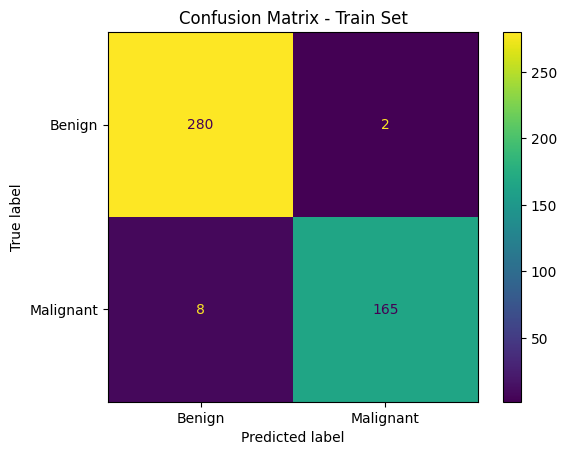

In [ ]:
# Accuracy
accTest = accuracy_score(y_test,yhatTest)
print(f'Test Accuracy: {accTest:.3f}')
accTrain = accuracy_score(y_train,yhatTrain)
print(f'Train Accuracy: {accTrain:.3f}')
print(40*'-')

# J-score
J_scoreTest = jaccard_score(y_test,yhatTest)
print(f'Test Jaccard Index: {J_scoreTest:.3f}')
J_scoreTrain = jaccard_score(y_train,yhatTrain)
print(f'Train Jaccard Index: {J_scoreTrain:.3f}')
print(40*'-')

# F-score
F_scoreTest = f1_score(y_test,yhatTest)
print(f'Test F-Score: {F_scoreTest:.3f}')
F_scoreTrain = f1_score(y_train,yhatTrain)
print(f'Train F-Score: {F_scoreTrain:.3f}')
print(40*'-')

#Log-loss
LogLossTest = log_loss(y_test,yhatTest)
print(f'Test Log-loss: {LogLossTest:.3f}')
LogLossTrain = log_loss(y_train,yhatTrain)
print(f'Train Log-loss: {LogLossTrain:.3f}')
print(40*'-')

# Confusion matrix

# Test set
CMTest = confusion_matrix(y_test,yhatTest)
dispTest = ConfusionMatrixDisplay(CMTest,display_labels=['Benign','Malignant'])
dispTest.plot()
plt.title('Confusion Matrix - Test Set')

# Train set
CMTrain = confusion_matrix(y_train,yhatTrain)
dispTrain = ConfusionMatrixDisplay(CMTrain,display_labels=['Benign','Malignant'])
dispTrain.plot()
plt.title('Confusion Matrix - Train Set')

#### Model Comparison

Result: For the given dataset and chosen hyper-parameters, the LR model outperforms the SVM model wrt the test set.

Further steps:


*   Fine-tune hyperparameters
*   Feature engineering
*   Deep learning

